In [4]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

/Users/henriquebueno/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


SystemError: GPU device not found

In [2]:
#Instalação de bibliotecas
!pip install -U gensim
!pip install -U nltk

Requirement already up-to-date: gensim in /Users/henriquebueno/anaconda/lib/python3.6/site-packages (3.6.0)
Requirement not upgraded as not directly required: smart-open>=1.2.1 in /Users/henriquebueno/anaconda/lib/python3.6/site-packages (from gensim) (1.7.1)
Requirement not upgraded as not directly required: scipy>=0.18.1 in /Users/henriquebueno/anaconda/lib/python3.6/site-packages (from gensim) (1.0.1)
Requirement not upgraded as not directly required: six>=1.5.0 in /Users/henriquebueno/anaconda/lib/python3.6/site-packages (from gensim) (1.10.0)
Requirement not upgraded as not directly required: numpy>=1.11.3 in /Users/henriquebueno/anaconda/lib/python3.6/site-packages (from gensim) (1.14.3)
Requirement not upgraded as not directly required: bz2file in /Users/henriquebueno/anaconda/lib/python3.6/site-packages (from smart-open>=1.2.1->gensim) (0.98)
Requirement not upgraded as not directly required: boto>=2.32 in /Users/henriquebueno/anaconda/lib/python3.6/site-packages (from smart-op

In [5]:
#Imports
import pandas as pd
import numpy as np
import nltk as nltk
from sklearn import datasets, linear_model
import gensim, logging

#set up logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [162]:
#Leitura do dataset

#df = pd.read_csv('ted_main.csv')
#df.ratings[0]
df = pd.read_csv('transcripts.csv')
#umTexto = df.transcript[0]
#olhar depois stopwords = nltk.corpus.stopwords.words('portuguese')
#acho que também precisarei fazer stemming: pegar do nltk.stem!!!!!!!!!!!!!!!!!!!!
#http://thalesbertaglia.com/enelvo/sobre/ para normalização
textos = df['transcript']
textos_URL = df['url']
#print(textos[0])
#print(textos_URL[0])


df2 = pd.read_csv('ted_main.csv')
#umTexto = df.transcript[0]
#olhar depois stopwords = nltk.corpus.stopwords.words('portuguese')
#acho que também precisarei fazer stemming: pegar do nltk.stem!!!!!!!!!!!!!!!!!!!!
#http://thalesbertaglia.com/enelvo/sobre/ para normalização
main_tags = df2['tags']
main_URL = df2['url']
#print(main_tags[0])
#print(main_URL[0])

#tabela que vai guardar o texto, os tags e as URLs
#
estruturaFinal=[]

#Existem alguns textos sem transcrições. Irei descartá-los
for indexTextos, textoURL in enumerate(textos_URL):
  for indexMain, linhaMainURL in enumerate(main_URL):
    if textoURL==linhaMainURL:
      estruturaFinal.append([textos[indexTextos], main_tags[indexMain], textoURL])
      break
      
#print(len(estruturaFinal))
print(estruturaFinal[0][0])
print(estruturaFinal[0][1])
print(estruturaFinal[0][2])
#print("===============")
#print(estruturaFinal[100][0])
#print(estruturaFinal[100][1])
#print(estruturaFinal[100][2])
#print("===============")
#print(estruturaFinal[1000][0])
#print(estruturaFinal[1000][1])
#print(estruturaFinal[1000][2])
#print("===============")
#print(estruturaFinal[2466][0])
#print(estruturaFinal[2466][1])
#print(estruturaFinal[2466][2])

textos=[]
for item in estruturaFinal:
  textos.append(item[0])
print(textos[0])

#As 2 estruturas que usarei o tempo todo são estruturaFinal (texto, tag e url) e textos (texto)
print(len(estruturaFinal))

Good morning. How are you?(Laughter)It's been great, hasn't it? I've been blown away by the whole thing. In fact, I'm leaving.(Laughter)There have been three themes running through the conference which are relevant to what I want to talk about. One is the extraordinary evidence of human creativity in all of the presentations that we've had and in all of the people here. Just the variety of it and the range of it. The second is that it's put us in a place where we have no idea what's going to happen, in terms of the future. No idea how this may play out.I have an interest in education. Actually, what I find is everybody has an interest in education. Don't you? I find this very interesting. If you're at a dinner party, and you say you work in education — Actually, you're not often at dinner parties, frankly.(Laughter)If you work in education, you're not asked.(Laughter)And you're never asked back, curiously. That's strange to me. But if you are, and you say to somebody, you know, they sa

In [163]:
#Etapa de pré-processamento
#Preciso dar mais atenção à etapa de pré-processamento

caracteresARemover = "[]?<>\{\}\(\)!@#$.,;:\"\'-_—♫"

textosProcessados = []
#Remoção de caracteres
for texto in textos:
  for i in range(0,len(caracteresARemover)):
    texto = texto.lower().replace(caracteresARemover[i]," ")
  textosProcessados.append(texto)
  
#Split dos textos e eliminação de palavras vazias
palavrasDeTodosOsTextos = []
for texto in textosProcessados:
  palavrasDeUmTexto = texto.split(" ")
  #removendo os strings vazios
  palavrasDeUmTexto = list(filter(None, palavrasDeUmTexto))
  palavrasDeTodosOsTextos.append(palavrasDeUmTexto)
  
#PENDENTE - Aplicar TF-IDF
#................
#................
#................

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in palavrasDeTodosOsTextos:
    for token in text:
        frequency[token] += 1  

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in palavrasDeTodosOsTextos]

#Preciso eliminar as linhas do processed_corpus que tem menos de NUM_COLUNAS palavras. Esse valor será ajustado para 300
NUM_COLUNAS=300
for index, linha in enumerate(processed_corpus):
  if len(linha)<NUM_COLUNAS:
    del processed_corpus[index]
    del estruturaFinal[index]
    del textos[index]#acho que nao precisa pq nao usarei mais essa estrutura

#POSSO REMOVER AS CLASSES PEQUENAS POR AQUI.................
    
print(len(processed_corpus))
print(len(estruturaFinal))#texto, tag e url
print(processed_corpus[0])

2432
2432
['good', 'morning', 'how', 'are', 'you', 'laughter', 'it', 's', 'been', 'great', 'hasn', 't', 'it', 'i', 've', 'been', 'blown', 'away', 'by', 'the', 'whole', 'thing', 'in', 'fact', 'i', 'm', 'leaving', 'laughter', 'there', 'have', 'been', 'three', 'themes', 'running', 'through', 'the', 'conference', 'which', 'are', 'relevant', 'to', 'what', 'i', 'want', 'to', 'talk', 'about', 'one', 'is', 'the', 'extraordinary', 'evidence', 'of', 'human', 'creativity', 'in', 'all', 'of', 'the', 'presentations', 'that', 'we', 've', 'had', 'and', 'in', 'all', 'of', 'the', 'people', 'here', 'just', 'the', 'variety', 'of', 'it', 'and', 'the', 'range', 'of', 'it', 'the', 'second', 'is', 'that', 'it', 's', 'put', 'us', 'in', 'a', 'place', 'where', 'we', 'have', 'no', 'idea', 'what', 's', 'going', 'to', 'happen', 'in', 'terms', 'of', 'the', 'future', 'no', 'idea', 'how', 'this', 'may', 'play', 'out', 'i', 'have', 'an', 'interest', 'in', 'education', 'actually', 'what', 'i', 'find', 'is', 'everybody'

In [83]:
#Recuperação dos modelos de embedding

import gensim.downloader as api
modelGlove = api.load("glove-wiki-gigaword-100")
modelWord2Vec = api.load("word2vec-google-news-300")
modelFastText = api.load("fasttext-wiki-news-subwords-300")

#como verificar se uma palavra existe em um Word2VecKeyedVectors?
#vector = modelGlove["cant"]  # numpy vector of a word
#vector.shape
#vector

2018-11-12 22:11:57,975 : INFO : loading projection weights from /Users/henriquebueno/gensim-data/glove-wiki-gigaword-100/glove-wiki-gigaword-100.gz
2018-11-12 22:12:42,814 : INFO : loaded (400000, 100) matrix from /Users/henriquebueno/gensim-data/glove-wiki-gigaword-100/glove-wiki-gigaword-100.gz


[==================================================] 100.0% 1662.8/1662.8MB downloaded


2018-11-12 22:53:12,775 : INFO : word2vec-google-news-300 downloaded
2018-11-12 22:53:12,809 : INFO : loading projection weights from /Users/henriquebueno/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz
2018-11-12 22:55:43,702 : INFO : loaded (3000000, 300) matrix from /Users/henriquebueno/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


[==================================================] 100.0% 958.5/958.4MB downloaded


2018-11-12 23:23:51,706 : INFO : fasttext-wiki-news-subwords-300 downloaded
2018-11-12 23:23:51,751 : INFO : loading projection weights from /Users/henriquebueno/gensim-data/fasttext-wiki-news-subwords-300/fasttext-wiki-news-subwords-300.gz
2018-11-12 23:29:04,562 : INFO : loaded (999999, 300) matrix from /Users/henriquebueno/gensim-data/fasttext-wiki-news-subwords-300/fasttext-wiki-news-subwords-300.gz


In [197]:
#Criação da matriz de embeddings

#agora vou converter a tabela de textos processed_corpus para uma
#tabela de vetores. Substitui cada vetor pela média de seus valores.
#Assim, a célula passou a ser um número e não um vetor.

numeroLinhas=len(processed_corpus)
numeroColunas=10000

#matrizDeVetores=[]
#matrizDeVetores=np.empty([len(processed_corpus), 10000])
matrizDeVetores=np.empty((numeroLinhas, numeroColunas))

for index, linha in enumerate(processed_corpus):
  #print(index)
  #linhaDeVetores=[]
  #linhaDeVetores=np.empty((1, numeroColunas))
  coluna=0
  for indicePalavra, palavra in enumerate(linha):
    try:
      vetorDaPalavra = modelGlove[palavra]
      
      #Sugestão para fazer a média do embedding
      #http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/
      mediaDoVetorDaPalavra=np.mean(vetorDaPalavra)
      #linhaDeVetores.append(vetorDaPalavra)
      #linhaDeVetores.append(mediaDoVetorDaPalavra)
      matrizDeVetores[index][coluna]=mediaDoVetorDaPalavra
      coluna=coluna+1
    except:
      #print(palavra)
      #print("Unexpected error:", sys.exc_info()[0])
      continue
    
  #matrizDeVetores.append(linhaDeVetores)
  #matrizDeVetores[index] = linhaDeVetores

print(len(matrizDeVetores[0]))
#print(matrizDeVetores)

10000


In [198]:
print(matrizDeVetores.shape)

#existe algum linha sem nenhuma palavra?
print(len(matrizDeVetores))

for elem in matrizDeVetores:
  if len(elem)==0:
    print(str(index) + "vazioooooooo!")

(2432, 10000)
2432


In [199]:
total=0
min=10000000
max=-1
for item in matrizDeVetores:
  total=total+len(item)
  if len(item)<min:
    min=len(item)
  if len(item)>max:
    max=len(item)
media=total/len(matrizDeVetores)
print("media " + str(media))
print("min " + str(min))
print("max " + str(max))


media 10000.0
min 10000
max 10000


In [200]:
print(matrizDeVetores[0])
print(matrizDeVetores[1])
print(matrizDeVetores[1][0])

[-0.05473387 -0.01562814 -0.07283049 ...  0.          0.
  0.        ]
[-0.02291973 -0.02679573 -0.04298361 ...  0.          0.
  0.        ]
-0.022919729351997375


In [201]:
#Vou limitar matrizDeVetores para 300 colunas


In [202]:
#Criação do vetor de classificações Y

#preciso gerar o código que gerará o vetor Y. Primeiro vou trabalhar com apenas
#o primeiro tag. Depois trabalharei com multi-label.
#df = pd.read_csv('ted_main.csv')
#df.ratings[0]
Y=[]
#tags = df['tags']

tags=[]
for item in estruturaFinal:
  tags.append(item[1])#0: texto, 1:tags, 2: url

for linha in tags:
  linha=linha.lower()
  linha=linha.replace("[","")
  linha=linha.replace("]","")
  linha=linha.replace("'","")
  linhaSplitada=linha.split(",")
  primeiroTagDaLinha=linhaSplitada[0]
  Y.append(primeiroTagDaLinha)
print(len(Y))
print(Y)
mySet=set(Y)
print(len(mySet))#numero de tags diferentes
print(mySet)
print(tags)

2432
['children', 'alternative energy', 'computers', 'macarthur grant', 'africa', 'business', 'christianity', 'architecture', 'god', 'christianity', 'activism', 'ted prize', 'ted prize', 'demo', 'children', 'entertainment', 'creativity', 'macarthur grant', 'dna', 'business', 'business', 'collaboration', 'business', 'cognitive science', 'culture', 'climate change', 'astronomy', 'business', 'business', 'ted brain trust', 'business', 'cancer', 'aging', 'alternative energy', 'africa', 'business', 'business', 'nasa', 'climate change', 'aids', 'ted prize', 'ted prize', 'culture', 'culture', 'ted brain trust', 'choice', 'ted brain trust', 'business', 'culture', 'culture', 'business', 'aids', 'anthropology', 'activism', 'astronomy', 'collaboration', 'cities', 'business', 'macarthur grant', 'macarthur grant', 'code', 'choice', 'africa', 'ted prize', 'activism', 'africa', 'ted brain trust', 'dna', 'brain', 'business', 'dna', 'ted brain trust', 'alternative energy', 'architecture', 'art', 'entert

In [203]:
print(Y[0])

children


In [204]:
#Apenas alguns gráficos

import collections
counter=collections.Counter(Y)
print(counter)
#print(counter.values())
#print(counter.keys())
#print(counter.most_common(3))
print("---")

#counter2 armazena as classes que possuem mais de 10 instâncias
counter2 = counter.most_common(58)
print(counter2)
print("---")

for e in counter2:
    print(str(e[0]) + " - " + str(e[1]))

    
    
    
    


Counter({'tedx': 293, 'business': 154, 'culture': 101, 'africa': 92, 'art': 90, 'ted fellows': 88, 'internet': 68, 'activism': 53, 'brain': 50, 'animals': 47, 'ai': 42, 'children': 41, 'architecture': 41, 'biology': 37, 'dna': 33, 'ted brain trust': 32, 'gender equality': 31, 'entertainment': 29, 'creativity': 29, 'cities': 26, 'adventure': 26, 'design': 25, 'collaboration': 22, 'communication': 22, 'big problems': 22, 'global issues': 21, 'alternative energy': 20, 'aging': 20, 'asia': 20, 'ted prize': 19, 'bioethics': 19, 'tedyouth': 19, 'senses': 17, 'europe': 17, 'tednyc': 17, 'astronomy': 16, 'aids': 16, 'comedy': 16, 'economics': 14, 'anthropocene': 14, 'nasa': 13, 'books': 13, 'behavioral economics': 13, 'ted books': 13, 'mars': 12, 'egypt': 12, 'crime': 12, 'middle east': 12, 'macarthur grant': 11, 'demo': 11, 'blindness': 11, 'climate change': 10, 'brazil': 10, 'beauty': 10, 'autism spectrum disorder': 10, 'agriculture': 10, 'ptsd': 10, 'criminal justice': 10, 'anthropology': 9

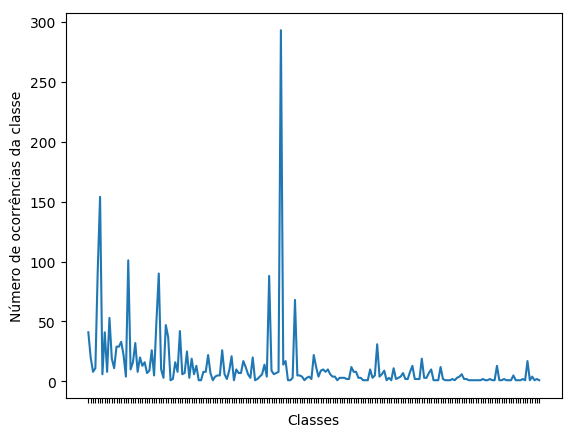

In [205]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

values=list(counter.values())
keys=list(counter.keys())
fig, ax=plt.subplots()
#ax.plot(values, keys)
ax.plot(keys, values)

fig_size=plt.rcParams["figure.figsize"]
fig_size[1]=5

#ax.barh(values, keys, align='center',color='green', ecolor='black')

#plt.rcdefaults()
#fig, ax = plt.subplots()

ax.set_xticklabels([])

ax.set_xlabel('Classes')
ax.set_ylabel('Número de ocorrências da classe')


fig.savefig("teste.jpg")
plt.show()

In [206]:
!!!!!
!!!!!
!!!!!
!!!!!
!!!!!
!!!!!!!!!!
###########Vou remover as classes que possuem menos de 10 instâncias!!!
print(Y)
#counter2 armazena as classes que possuem mais de 10 instâncias
counter2 = counter.most_common(58)
print(counter2)
print("---")

listaDeClassesAManter=[]
for e in counter2:
  listaDeClassesAManter.append(e[0])

#listaDePosicoesADeletar=[]
#for index1, classe1 in enumerate(listaDeClassesAManter):
#  if classe1 in Y:
#    print("A classe "+str(classe1)+" NAO deve ser deletada de Y")
#  else:
#    print("A classe "+str(classe1)+" deve ser deletada de Y")
    
#tempX = X.copy()
#tempY = Y.copy()
 
novoX=[]
novoY=[]

X=matrizDeVetores
    
for pos, elem in enumerate(Y):
    if elem in listaDeClassesAManter:
        #print("Vou manter "+str(elem))
        novoX.append(X[pos])
        novoY.append(Y[pos])
    #else:
        #print("Não vou manter "+str(elem))
        #del tempY[pos]
        #del tempX[pos]
        

print(len(novoX))
print(len(novoY))

X=novoX
Y=novoY


['children', 'alternative energy', 'computers', 'macarthur grant', 'africa', 'business', 'christianity', 'architecture', 'god', 'christianity', 'activism', 'ted prize', 'ted prize', 'demo', 'children', 'entertainment', 'creativity', 'macarthur grant', 'dna', 'business', 'business', 'collaboration', 'business', 'cognitive science', 'culture', 'climate change', 'astronomy', 'business', 'business', 'ted brain trust', 'business', 'cancer', 'aging', 'alternative energy', 'africa', 'business', 'business', 'nasa', 'climate change', 'aids', 'ted prize', 'ted prize', 'culture', 'culture', 'ted brain trust', 'choice', 'ted brain trust', 'business', 'culture', 'culture', 'business', 'aids', 'anthropology', 'activism', 'astronomy', 'collaboration', 'cities', 'business', 'macarthur grant', 'macarthur grant', 'code', 'choice', 'africa', 'ted prize', 'activism', 'africa', 'ted brain trust', 'dna', 'brain', 'business', 'dna', 'ted brain trust', 'alternative energy', 'architecture', 'art', 'entertainme

In [207]:
if -1 in Y:
    print(1)

In [208]:
print(X)
print(Y)
print(len(X))
print(len(Y))

[array([-0.05473387, -0.01562814, -0.07283049, ...,  0.        ,
        0.        ,  0.        ]), array([-0.02291973, -0.02679573, -0.04298361, ...,  0.        ,
        0.        ,  0.        ]), array([-0.03568606, -0.02679573, -0.05329238, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.0325368 ,  0.0092679 , -0.04125041, ...,  0.        ,
        0.        ,  0.        ]), array([-0.02291973, -0.02679573, -0.01811643, ...,  0.        ,
        0.        ,  0.        ]), array([-0.01811643,  0.12916328, -0.05844571, ...,  0.        ,
        0.        ,  0.        ]), array([-0.01811643,  0.12916328, -0.05844571, ...,  0.        ,
        0.        ,  0.        ]), array([-0.01811643, -0.02680616,  0.04567123, ...,  0.        ,
        0.        ,  0.        ]), array([-0.01811643,  0.12916328, -0.02795817, ...,  0.        ,
        0.        ,  0.        ]), array([-0.01811643,  0.12916328, -0.05314348, ...,  0.        ,
        0.        ,  0.        ]), array([-0

In [209]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# define example
#data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
data = Y

values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

Y = integer_encoded
print(Y)

['children' 'alternative energy' 'macarthur grant' ... 'ai' 'internet'
 'cities']
[25  7 45 ...  5 44 26]


In [210]:
#separando bases de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=4)

In [211]:
#Aplicando Regressão Logística

from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1.0)

#tuned_params representa os valores possiveis que serao testados para os parametros de inicializacao do classificador
#tuned_params = {"k":[1,2,3,4], "tol":[0.001, 0.002, 0.003, 0.007]}
tuned_params = {}
#tuned_params = {"tol":[0.001, 0.002, 0.003, 0.007]}
#gs = GridSearchCV(MLPClassifier(), tuned_params)
gs = GridSearchCV(logreg, tuned_params)

gs.fit(X_train, y_train)
gs.best_params_
#gs.predict(X_train)
gs.score(X_test, y_test)#percentual de acerto
#print("acabou")
print("Melhor acurácia: " + str(gs.best_score_))
print("Melhores parâmetros"+ str(gs.best_params_))

Melhor acurácia: 0.16314639475600873
Melhores parâmetros{}


In [212]:
#Aplicando Redes Neurais

from sklearn.neural_network import MLPClassifier
from sklearn.grid_search import GridSearchCV

#tuned_params representa os valores possiveis que serao testados para os parametros de inicializacao do classificador
#tuned_params = {"k":[1,2,3,4], "tol":[0.001, 0.002, 0.003, 0.007]}
tuned_params = {}
#tuned_params = {"tol":[0.001, 0.002, 0.003, 0.007]}

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

gs = GridSearchCV(MLPClassifier(), tuned_params)


gs.fit(X_train, y_train)
gs.best_params_
#gs.predict(X_train)
gs.score(X_test, y_test)#percentual de acerto
#print("acabou")
print("Melhor acurácia: " + str(gs.best_score_))
print("Melhores parâmetros"+ str(gs.best_params_))

Melhor acurácia: 0.12017479970866715
Melhores parâmetros{}


# Rascunhos


In [0]:
#palavrasDeTodosOsTextos
#frequency
#processed_corpus

In [0]:
#from gensim import corpora

#dictionary = corpora.Dictionary(processed_corpus)
#print(dictionary)
#45427 unique tokens: ["'30s", '15', '16', '1930s', '19th']...) from 2467 documents

In [0]:
#print(dictionary.token2id)

In [0]:
#preciso implementar o seguinte: pegar as 30 primeiras palavras de cada texto e 
#pegar o vetor delas (farei isso para cada tipo de embedding).



model = gensim.models.Word2Vec(processed_corpus, min_count=1)

In [0]:
#print(model)
#print(model.wv.vocab)
model.most_similar("music")

In [0]:
modelGlove.train(["henrique", "heloisa"])

In [0]:
  modelGlove.most_similar(positive=['woman', 'king'], negative=['man'])

In [0]:
api.info()

In [0]:
QTD_TEXTOS=len(Y)
QTD_PALAVRAS=30

In [0]:
#construção da tabela entrada da regressão X
Y
X=np.array(ndmin=2)
numeroDaLinha=-1
for text in texts:
  numeroDaLinha+=1
  for i in range(QTD_PALAVRAS):#vou pegar as 30 primeiras palavras de cada texto
    palavra = text[i]
    vetorDaPalavra = modelo[palavra]
    X[numeroDaLinha][i]=vetorDaPalavra
    

In [0]:
#nltk.download()

In [0]:
#https://radimrehurek.com/gensim/models/keyedvectors.html é melhor usar full model 
# quando You need the full model to train or update vectors.
#The reason for separating the trained vectors into KeyedVectors is that if you don’t need 
#the full model state any more (don’t need to continue training), the state can discarded, 
#resulting in a much smaller and faster object that can be mmapped for lightning fast loading 
#and sharing the vectors in RAM between processes:



# Load Google's pre-trained Word2Vec model.
#depreciado
#model = gensim.models.Word2Vec.load_word2vec_format('./model/GoogleNews-vectors-negative300.bin', binary=True)  
from gensim.test.utils import datapath
from gensim.models import KeyedVectors
#Vectors exported by the Facebook and Google tools do not support further training, 
#but you can still load them into KeyedVectors.
wv_from_text = KeyedVectors.load_word2vec_format(datapath('word2vec_pre_kv_c'), binary=False)  # C text format


In [0]:
from gensim.models import Word2Vec
model = Word2Vec(common_texts, size=100, window=5, min_count=1, workers=4)
model.train()

In [0]:
#model = gensim.models.Word2Vec(processed_corpus, min_count=1)
model = gensim.models.Word2Vec(['carro','barco'], min_count=1)

In [0]:
model=gensim.models.Word2Vec.load_word2vec_format()#depreciado

In [0]:
import gensim.downloader as api
api.info()

In [0]:


word_vectors = api.load("glove-wiki-gigaword-100")

In [0]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(cars).mark_bar().encode(
  x=alt.X('Miles_per_Gallon', bin=True),
  y='count()',
)

In [0]:
#https://github.com/RaRe-Technologies/gensim
#https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/gensim%20Quick%20Start.ipynb



raw_corpus = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",              
             "Relation of user perceived response time to error measurement",
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "Graph minors A survey"]

# Create a set of frequent words
stoplist = set('for a of the and to in'.split(' '))
# Lowercase each document, split it by white space and filter out stopwords
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in raw_corpus]

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]
processed_corpus


In [0]:




#These datasets contain information about all audio-video recordings of TED Talks uploaded to the official TED.com website until September 21st, 2017. The TED main dataset contains information about all talks including number of views, number of comments, descriptions, speakers and titles. The TED transcripts dataset contains the transcripts for all talks available on TED.com.
#There are two CSV files:
#ted_main.csv - Contains data on actual TED Talk metadata and TED Talk speakers.
#transcripts.csv - Contains transcript and URL information for TED Talks

